# Linear regression analysis of fish dataset

In [112]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [113]:
df=pd.read_csv('Fish.csv', sep=',')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [114]:
df=df.dropna()

In [115]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [116]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [117]:
df.shape

(159, 7)

In [118]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

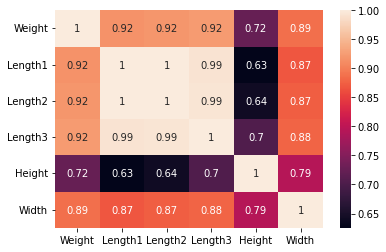

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Text(0.5, 1.0, 'Value of species')

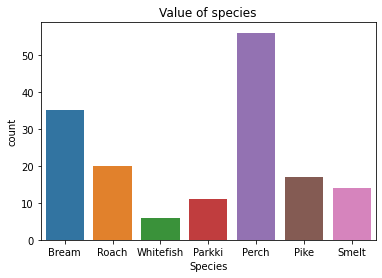

In [121]:
sns.countplot(data=df,  x='Species')
plt.title('Value of species')


In [122]:
Species=df['Species'].value_counts()

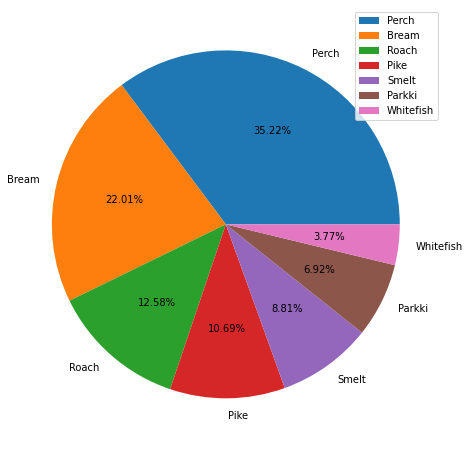

In [123]:
plt.figure(figsize=(10,8))
plt.pie(Species.values, labels=Species.index, autopct='%1.2f%%')
plt.legend()

In [124]:
# sns.pairplot(df)
# plt.savefig('fish.png')

In [125]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<AxesSubplot:xlabel='Weight'>

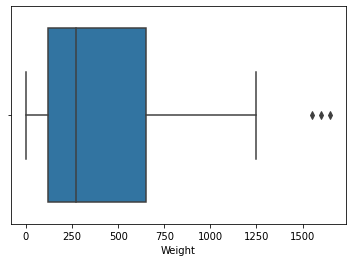

In [126]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(df['Weight'])

In [127]:
# checking ourlier rowa
fweight=df['Weight']
Q3=fweight.quantile(0.75)
Q1=fweight.quantile(0.25)
IQR=Q3-Q1
lowerlimit=Q1- (1.5*IQR)
upperlimit=Q3+ (1.5*IQR)
weight_outliers=fweight[(fweight<lowerlimit) | (fweight>upperlimit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Length1'>

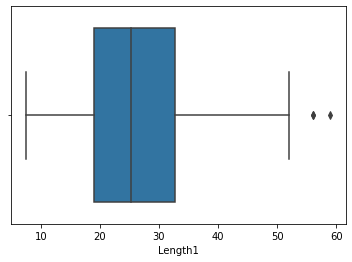

In [128]:
sns.boxplot(df['Length1'])

In [129]:
fweight=df['Length1']
Q3=fweight.quantile(0.75)
Q1=fweight.quantile(0.25)
IQR=Q3-Q1
lowerlimit=Q1- (1.5*IQR)
upperlimit=Q3+ (1.5*IQR)
weight_outliers=fweight[(fweight<lowerlimit) | (fweight>upperlimit)]
weight_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

<AxesSubplot:xlabel='Length2'>

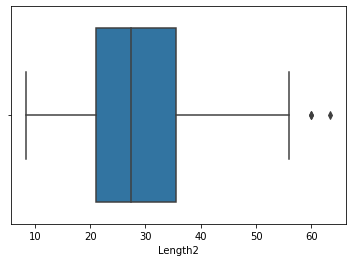

In [130]:
sns.boxplot(df['Length2'])

In [131]:
fweight=df['Length2']
Q3=fweight.quantile(0.75)
Q1=fweight.quantile(0.25)
IQR=Q3-Q1
lowerlimit=Q1- (1.5*IQR)
upperlimit=Q3+ (1.5*IQR)
weight_outliers=fweight[(fweight<lowerlimit) | (fweight>upperlimit)]
weight_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

<AxesSubplot:xlabel='Length3'>

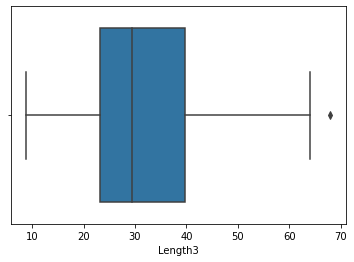

In [132]:
sns.boxplot(df['Length3'])

In [133]:
fweight=df['Length3']
Q3=fweight.quantile(0.75)
Q1=fweight.quantile(0.25)
IQR=Q3-Q1
lowerlimit=Q1- (1.5*IQR)
upperlimit=Q3+ (1.5*IQR)
weight_outliers=fweight[(fweight<lowerlimit) | (fweight>upperlimit)]
weight_outliers

144    68.0
Name: Length3, dtype: float64

In [139]:
df=df.drop([142,143,144])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [140]:
df=df.drop(['Species'],axis=1)

In [141]:
x=df.drop(['Weight'],axis=1)
y=df['Weight']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=32)

In [144]:
xtrain.head()

,Length1,Length2,Length3,Height,Width
56,24.1,26.5,29.3,8.1454,4.2485
57,25.6,28.0,30.8,8.7780,4.6816
15,29.4,32.0,37.2,15.4380,5.5800
156,12.1,13.0,13.8,2.2770,1.2558
33,37.4,41.0,45.9,18.6354,6.7473


In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model=LinearRegression()

In [147]:
model.fit(xtrain,ytrain)

LinearRegression()

In [148]:
pred=model.predict(xtest)

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

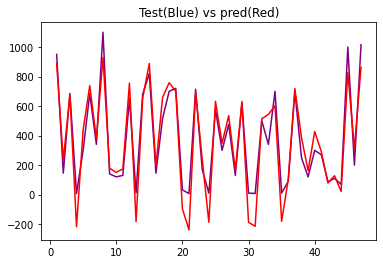

In [149]:
plt.plot(c, ytest,color = 'purple')
plt.plot(c, pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

In [150]:
list(zip(ytest,predict))

[(950.0, 886.4749145594567),
 (145.0, 234.58624139202988),
 (685.0, 674.0217088666323),
 (7.0, -218.21162260999478),
 (300.0, 437.5729177285402),
 (685.0, 738.4318257783061),
 (340.0, 377.922827305093),
 (1100.0, 929.2461866213989),
 (140.0, 178.85730722852026),
 (120.0, 150.42979852557988),
 (130.0, 174.2189360012125),
 (650.0, 755.1134558860972),
 (12.2, -182.9856424080083),
 (680.0, 653.5220333797665),
 (820.0, 889.0515668725986),
 (145.0, 192.7270616379637),
 (514.0, 657.0744693041038),
 (700.0, 758.0108942350334),
 (720.0, 699.7358871252654),
 (32.0, -95.60341887299859),
 (6.7, -239.35865607074237),
 (714.0, 693.9984158747402),
 (170.0, 238.35349470824525),
 (9.7, -187.6844277917317),
 (575.0, 632.2931734884114),
 (300.0, 347.9989721304726),
 (475.0, 534.9177719975203),
 (130.0, 164.93746106508837),
 (620.0, 631.2123950177236),
 (9.9, -187.97284703603867),
 (7.5, -214.77884306451688),
 (500.0, 513.8357179454308),
 (340.0, 543.488686972719),
 (700.0, 602.8619457202612),
 (10.0, -18